In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['movies', 'irisdata']


## First 5 rows of the dataset

In [2]:
# loading libraries
import pandas as pd

# define column names
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Species']

# loading training data
df = pd.read_csv('../input/irisdata/iris.data', header=None, names=names)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## CHecking for correlation

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


## Scatter plot between Sepal width and Sepal Length 

Text(0, 0.5, 'Sepal length')

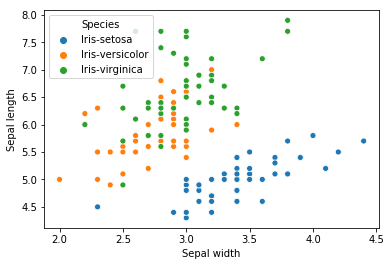

In [5]:
sns.scatterplot(x=df["sepal_width"],y=df["sepal_length"],hue=df["Species"])
plt.xlabel("Sepal width")
plt.ylabel("Sepal length")

## Scatter PLot between PEtal Width and Petal Length

Text(0, 0.5, 'Petal length')

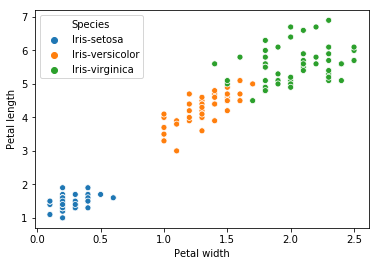

In [6]:
sns.scatterplot(df["petal_width"],df["petal_length"],hue=df["Species"])
plt.xlabel("Petal width")
plt.ylabel("Petal length")

In [7]:
from sklearn.model_selection import train_test_split
x=df[["sepal_length"]]
y=df["Species"]

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [11]:
pred=knn.predict(x_test)

In [12]:
neighbors = list(range(1,50,2))


## CHecking for optimal value of K

In [13]:
cv_scores=[]

import sklearn.model_selection
from sklearn.model_selection import cross_val_score


In [14]:
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores= sklearn.model_selection.cross_val_score(knn,x_train,y_train,cv=10)
    cv_scores.append(scores.mean())

The minimum MSE is  0.27075757575757575
The optimal number of neighbors is  11


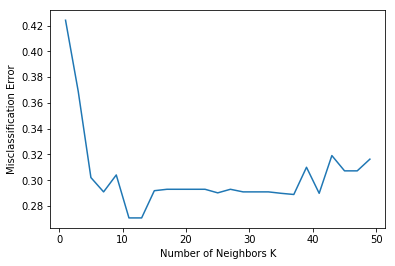

In [15]:
MSE=[1-x for x in cv_scores]
print("The minimum MSE is ",min(MSE))
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is ",optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

